# Clean Data of the results of experiment 2
- This program is used to export the txt file to dataframe in python. The txt is captured from the experiment#2 in Github. File location : https://github.com/tawanmeow/privacy-sdn-logfile/tree/main/Experiment2
- Find maximum throughput by sending packets from Edge4 to Edge1 and Edge5 simultaneously.
- Edge4 perspective (Client)
- Command: $iperf3 -u -c 10.0.0.1 -T edge1 -b0 -t 30s -i1 -p 5201 & iperf3 -u -c 10.0.0.5 -T edge5 -b0 -t 30s -i1 -p 5202
-----------------------------------------------------------
*
[1] 1179
edge1:  Connecting to host 10.0.0.1, port 5201
edge5:  Connecting to host 10.0.0.5, port 5202
edge1:  [  5] local 10.0.0.4 port 60991 connected to 10.0.0.1 port 5201
edge5:  [  5] local 10.0.0.4 port 48228 connected to 10.0.0.5 port 5202
### Edge4 perspective (Client)

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io

## Input filename that you want to clean data

In [2]:
# this pandas version dose not support directlly loading the file from url.
url = 'https://github.com/tawanmeow/privacy-sdn-logfile/tree/main/Experiment2'
filename = "/Users/kalika/PycharmProjects/Privacy_SDN_Edge_IoT/PlanB/Experiment2/test2_client.txt"
filename_csv = "/Users/kalika/PycharmProjects/Privacy_SDN_Edge_IoT/PlanB/Experiment2/test2_client.txt"


## Functions for getting the throughput data from dataframe df

In [3]:
def getDatafromTxT(filename, headerrange):
    """
    Get dataframe from txt file:
    filename : xxx.txt
    headerrange : number of lines that needed to be removed. 
    
    return : df : datafame type
    """
    h = headerrange + 1
    skip_1 = list(range(0,h, 1))
    df = pd.read_csv(filename,
        skiprows=skip_1,
        header=None,
        delimiter=' ',
        skipinitialspace=True,
        error_bad_lines=False)
    return df

In [4]:
def getDataframeThru(df,start_row,measurement_interval,header_range):
    '''
    This functions will import the dataframe without the header of txt file and cut the df 
    Input: 
        df = dataframe
        measurement_interval = 30 (sec) : 
        header_range = 10 lines
        start_row = 0 
    Return: 
        df1t : dataframe with its range [strat_row, measurement_interval]
    '''
    
    df1 = df.drop(labels=range(start_row, header_range), axis=0)  # Cut df from the top to header_range
    df1t = df1.drop(labels=range(measurement_interval, len(df)), axis=0) # Cut df from the measurement_interval to the end of df 
    
    return df1t

In [5]:
## Find start row index of itteration
def getStartEndID(df,condition,start_data,end_data):
    """
    To search the strating indices and the ending indices in df with the keypoint of start_data and end_data 
    Input: 
        df : datafram without header of txt file 
        start_data : keypoint of start_data
        end_data : keypoint of end_data
        condition : column index for search condition
        
    Output
        strat_indices_list : start indices list
        
    """
    # creating and passing series to new column
    df["Start"]= df[condition].str.find(start_data)
    df["End"]= df[condition].str.find(end_data)

    index = df.index
    strat_indices = index[df["Start"]==0.0]
    strat_indices_list = strat_indices.tolist()
    end_indices = index[df["End"]==0.0]
    end_indices_list = end_indices.tolist()
    
    
    return strat_indices_list, end_indices_list
    

In [6]:
def getCleanData(df,strat_indices_list,end_indices_list):
    """
    
    """
    df_all = df.drop(labels=range(1, len(df)), axis=0) # create new df
    start_row = 0
    c = 0
    for i in strat_indices_list: 
        
        h = i
        print('h =',h)
        m = end_indices_list[c]
        print('m =', m)
        df1 = getDataframeThru(df,start_row,m,h)
        print('df1 = ', df1)
        result = pd.concat([df_all,df1])
        df_all = result
        c = c + 1
        if i == 0:
            
            df_all = df_all.drop(labels=0, axis=0)
        
        
    return df_all

## Run functions:

In [7]:
headerrange = 14 # counting from the header of text to the data - 1
df = getDatafromTxT(filename, headerrange)
print(df.head)

<bound method NDFrame.head of           0      1      2            3         4        5       6           7  \
0    edge5:      [     5]    0.00-1.00       sec     1.81  MBytes        15.2   
1    edge1:      [     5]    1.00-2.00       sec     1.75  MBytes        14.7   
2    edge5:      [     5]    1.00-2.00       sec     1.74  MBytes        14.6   
3    edge1:      [     5]    2.00-3.00       sec     1.85  MBytes        15.5   
4    edge5:      [     5]    2.00-3.00       sec     1.85  MBytes        15.5   
..      ...    ...    ...          ...       ...      ...     ...         ...   
709  edge1:  iperf  Done.          NaN       NaN      NaN     NaN         NaN   
710  edge5:      [     5]  29.00-30.00       sec     1.86  MBytes        15.6   
711  edge5:      [    ID]     Interval  Transfer  Bitrate  Jitter  Lost/Total   
712  edge5:    NaN    NaN          NaN       NaN      NaN     NaN         NaN   
713  edge5:  iperf  Done.          NaN       NaN      NaN     NaN         NaN  

b'Skipping line 74: expected 10 fields, saw 26\nSkipping line 76: expected 10 fields, saw 14\nSkipping line 77: expected 10 fields, saw 14\nSkipping line 81: expected 10 fields, saw 26\nSkipping line 83: expected 10 fields, saw 14\nSkipping line 84: expected 10 fields, saw 14\nSkipping line 87: expected 10 fields, saw 14\nSkipping line 94: expected 10 fields, saw 12\nSkipping line 95: expected 10 fields, saw 12\nSkipping line 157: expected 10 fields, saw 26\nSkipping line 159: expected 10 fields, saw 14\nSkipping line 160: expected 10 fields, saw 14\nSkipping line 164: expected 10 fields, saw 26\nSkipping line 166: expected 10 fields, saw 14\nSkipping line 167: expected 10 fields, saw 14\nSkipping line 170: expected 10 fields, saw 14\nSkipping line 176: expected 10 fields, saw 12\nSkipping line 180: expected 10 fields, saw 12\nSkipping line 239: expected 10 fields, saw 26\nSkipping line 241: expected 10 fields, saw 14\nSkipping line 242: expected 10 fields, saw 14\nSkipping line 247: e

## Run functions

In [8]:
start_data = '1.00-2.00'
end_data = '27.00-28.00'
condition = 3
strat_indices_list, end_indices_list = getStartEndID(df,condition,start_data,end_data)
print('strat_indices_list: ', strat_indices_list)
print('end_indices_list: ', end_indices_list)


strat_indices_list:  [1, 2, 73, 74, 143, 147, 216, 220, 288, 292, 362, 363, 434, 435, 506, 507, 578, 579, 650, 651]
end_indices_list:  [53, 54, 125, 126, 196, 199, 269, 272, 341, 344, 414, 415, 486, 487, 558, 559, 630, 631, 702, 703]


In [9]:
start_data = 'edge5:'
end_data = 'edge1:'
condition = 0
edge5_list, edge1_list = getStartEndID(df,condition,start_data,end_data)
print('edge5_list: ', edge5_list)
print('edge1_list: ', edge1_list)


edge5_list:  [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 61, 62, 63, 64, 68, 71, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 133, 134, 135, 136, 142, 144, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199, 204, 205, 206, 207, 208, 215, 217, 218, 220, 222, 224, 226, 228, 230, 232, 234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258, 260, 262, 264, 266, 268, 270, 272, 273, 278, 279, 280, 281, 287, 289, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310, 312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336, 338, 340, 342, 344, 349, 350, 351, 352, 353, 357, 360, 361, 363, 365, 367, 369, 371, 373, 375, 377, 379, 381, 383, 385, 387, 389, 391, 393, 395, 397, 399, 401, 403, 405, 407, 409, 411, 413, 415, 417, 418, 419, 420, 421, 

In [10]:
def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))

In [11]:
edge5_start_list = intersection(edge5_list, strat_indices_list)
edge5_end_list = intersection(edge5_list, end_indices_list)
edge5_start_list.sort()
edge5_end_list.sort()

print('edge5_start: ',edge5_start_list)
print('edge5_end',edge5_end_list)



edge5_start:  [2, 74, 147, 220, 292, 363, 435, 507, 579, 651]
edge5_end [54, 126, 199, 272, 344, 415, 487, 559, 631, 703]


In [12]:
df_all = getCleanData(df,edge5_start_list,edge5_end_list)

h = 2
m = 54
df1 =           0  1   2            3    4     5       6     7          8       9  \
2   edge5:  [  5]    1.00-2.00  sec  1.74  MBytes  14.6  Mbits/sec  1260.0   
3   edge1:  [  5]    2.00-3.00  sec  1.85  MBytes  15.5  Mbits/sec  1340.0   
4   edge5:  [  5]    2.00-3.00  sec  1.85  MBytes  15.5  Mbits/sec  1340.0   
5   edge1:  [  5]    3.00-4.00  sec  1.88  MBytes  15.8  Mbits/sec  1360.0   
6   edge5:  [  5]    3.00-4.00  sec  1.89  MBytes  15.9  Mbits/sec  1370.0   
7   edge1:  [  5]    4.00-5.00  sec  1.86  MBytes  15.6  Mbits/sec  1350.0   
8   edge5:  [  5]    4.00-5.00  sec  1.86  MBytes  15.6  Mbits/sec  1350.0   
9   edge1:  [  5]    5.00-6.00  sec  1.85  MBytes  15.5  Mbits/sec  1340.0   
10  edge5:  [  5]    5.00-6.00  sec  1.86  MBytes  15.6  Mbits/sec  1350.0   
11  edge1:  [  5]    6.00-7.00  sec  1.91  MBytes  16.0  Mbits/sec  1380.0   
12  edge5:  [  5]    6.00-7.00  sec  1.89  MBytes  15.9  Mbits/sec  1370.0   
13  edge1:  [  5]    7.00-8.00  sec  1.85  M

630     -1    0  
h = 651
m = 703
df1 =            0  1   2            3    4     5       6     7          8       9  \
651  edge5:  [  5]    1.00-2.00  sec  1.77  MBytes  14.8  Mbits/sec  1280.0   
652  edge1:  [  5]    2.00-3.00  sec  1.80  MBytes  15.1  Mbits/sec  1300.0   
653  edge5:  [  5]    2.00-3.00  sec  1.80  MBytes  15.1  Mbits/sec  1300.0   
654  edge1:  [  5]    3.00-4.00  sec  1.85  MBytes  15.5  Mbits/sec  1340.0   
655  edge5:  [  5]    3.00-4.00  sec  1.84  MBytes  15.4  Mbits/sec  1330.0   
656  edge1:  [  5]    4.00-5.00  sec  1.80  MBytes  15.1  Mbits/sec  1300.0   
657  edge5:  [  5]    4.00-5.00  sec  1.80  MBytes  15.1  Mbits/sec  1300.0   
658  edge1:  [  5]    5.00-6.00  sec  1.81  MBytes  15.2  Mbits/sec  1310.0   
659  edge5:  [  5]    5.00-6.00  sec  1.82  MBytes  15.3  Mbits/sec  1320.0   
660  edge1:  [  5]    6.00-7.00  sec  1.85  MBytes  15.5  Mbits/sec  1340.0   
661  edge5:  [  5]    6.00-7.00  sec  1.85  MBytes  15.5  Mbits/sec  1340.0   
662  edge1:

In [13]:
# Replace new columns header

df_all_new = df_all.drop(df_all.columns[[1,2,4,6,8,10]], axis=1)  ## remove unnecessary columns
df_all_new.rename({0 : 'Edge', 3 :'Interval', 5 : 'Transfer', 7 :'Bitrate', 9 :'Total Datagrams'}, axis=1, inplace=True)
print(df_all_new)

       Edge     Interval Transfer Bitrate  Total Datagrams  End
0    edge5:    0.00-1.00     1.81    15.2           1310.0   -1
2    edge5:    1.00-2.00     1.74    14.6           1260.0   -1
3    edge1:    2.00-3.00     1.85    15.5           1340.0    0
4    edge5:    2.00-3.00     1.85    15.5           1340.0   -1
5    edge1:    3.00-4.00     1.88    15.8           1360.0    0
..      ...          ...      ...     ...              ...  ...
698  edge1:  25.00-26.00     1.84    15.4           1330.0    0
699  edge5:  25.00-26.00     1.85    15.5           1340.0   -1
700  edge1:  26.00-27.00     1.88    15.8           1360.0    0
701  edge5:  26.00-27.00     1.86    15.6           1350.0   -1
702  edge1:  27.00-28.00     1.85    15.5           1340.0    0

[521 rows x 6 columns]


## Plot dataframe

In [14]:
print(df_all_new['Bitrate'])

0      15.2
2      14.6
3      15.5
4      15.5
5      15.8
       ... 
698    15.4
699    15.5
700    15.8
701    15.6
702    15.5
Name: Bitrate, Length: 521, dtype: object


In [15]:

df_all_new['Bitrate'] = df_all_new['Bitrate'].astype(float) 

In [16]:
print(len(df_all_new.index))
time = np.array(range(len(df_all_new.index)))
print(time)

df_all_new['Time'] = time
print(df_all_new.head)
df_all_new['Time'] = df_all_new['Time'].astype(int) 


521
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 24

In [17]:
## Throughput

In [18]:
# avergae throughput 
sumThroughput = df_all_new['Bitrate'].sum()
avgSumThroughput = sumThroughput/len(time)
print('avg Throughput :', avgSumThroughput)
print('var Throughput :', df_all_new['Bitrate'].var())

avg Throughput : 15.544337811900192
var Throughput : 0.07916499335597176


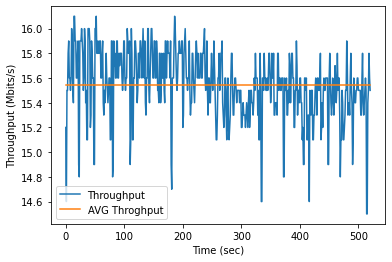

In [19]:
# Throughput 
ax = plt.gca()
df_all_new.plot(kind='line', x='Time', y='Bitrate', ax =ax)
plt.legend(["Throughput"]);
ax.set_xlabel("Time (sec)")
ax.set_ylabel("Throughput (Mbits/s)")
avg_thr = np.ones(len(df_all_new.index),dtype = float)*avgSumThroughput
s = pd.DataFrame(avg_thr, columns = ['AVG Throghput'])
s.plot(ax=ax)
plt.show()